## Проект 8. Сбореый_проект_2. Добыча золота.

### Описание проекта и постановка задачи.

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды.
Решите сами, какие детали нужны для построения модели, а какие — нет.

### Описание данных.

Данные находятся в трёх файлах:
* gold_recovery_train.csv — обучающая выборка;
* gold_recovery_test.csv — тестовая выборка;
* gold_recovery_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date).  
Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Загрузка и подготовка данных
1.1. Откройте файлы и изучите их.
Путь к файлам:
* /datasets/gold_recovery_train.csv.
* /datasets/gold_recovery_test.csv.
* /datasets/gold_recovery_full.csv.  

1.2. Проверьте, что эффективность обогащения рассчитана правильно.
Вычислите её на обучающей выборке для признака rougher.output.recovery.
Найдите MAE между вашими расчётами и значением признака. Опишите
выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это
за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#from scipy import stats as st

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #, train_test_split
from sklearn.tree import DecisionTreeRegressor #,DecisionTreeClassifier, plot_tree
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression #,LogisticRegression 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error, make_scorer #, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score


### Загрузка данных

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

### Изучение данных

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(data_train.sample(3).T)
#display(data_test.sample(3))
#display(data_full.sample(3))

,7347,16421,11772
date,2017-03-18 02:59:59,2018-07-31 04:59:59,2018-01-18 11:59:59
final.output.concentrate_ag,4.66297,3.3324,3.92366
final.output.concentrate_pb,8.88069,8.72712,9.28499
final.output.concentrate_sol,9.98639,10.9092,9.5469
final.output.concentrate_au,48.1023,46.0578,47.3442
final.output.recovery,65.8267,72.7778,68.4477
final.output.tail_ag,8.65855,12.8188,10.7871
final.output.tail_pb,2.20624,2.69352,2.54273
final.output.tail_sol,12.6022,10.4049,6.12046
final.output.tail_au,2.60881,2.90285,3.65673


In [4]:
#data_train.info()
#data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
#переименуем названия столбцов
for df in [data_train, data_test, data_full]:
    columns=df.columns
    columns1 = [row.replace('.', '_') for row in columns]
    columns2 = [row.replace('primary_cleaner', '1cl') for row in columns1]
    columns3 = [row.replace('rougher', '0cl') for row in columns2]
    columns4 = [row.replace('secondary_cleaner', '2cl') for row in columns3]
    columns5 = [row.replace('floatbank', 'fb') for row in columns4]
    columns6 = [row.replace('concentrate', 'con') for row in columns5]
    columns7 = [row.replace('input', 'in') for row in columns6]
    columns8 = [row.replace('output', 'out') for row in columns7]
    columns9 = [row.replace('state', 'st') for row in columns8]
    columns10 = [row.replace('calculation', 'calc') for row in columns9]
    df.set_axis(columns10, axis='columns', inplace=True)
#data_train.info()

In [6]:
#признаки "полезной" концентрации металлов на разных этапах
au_con = ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']
ag_con = ['0cl_in_feed_ag', '0cl_out_con_ag', '1cl_out_con_ag', 'final_out_con_ag']
pb_con = ['0cl_in_feed_pb', '0cl_out_con_pb', '1cl_out_con_pb', 'final_out_con_pb']
legend = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']
#признаки концентрации в "хвостах" на разных этапах
au_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
ag_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
pb_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
legend_tail = ['после флотации', 'после первичной очистки', 'после вторичной очистки', 'финальные хвосты']

### Проверка правильности расчета rougher.output.recovery

In [7]:
#вынесем необходимые данные в отдельный df
data_MAE = data_train.loc[:, ['0cl_out_recovery', '0cl_out_con_au', '0cl_in_feed_au', '0cl_out_tail_au']]

_c1 = data_MAE['0cl_out_con_au']
_f1 = data_MAE['0cl_in_feed_au']
_t1 = data_MAE['0cl_out_tail_au']
data_MAE['0cl_out_recovery_2'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

data_MAE.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE.dropna(subset=['0cl_out_recovery_2'], inplace=True) 
print()
data_MAE.info()

print('Нет первоначального расчета rougher.output.recovery')
display(data_MAE[data_MAE['0cl_out_recovery']!=data_MAE['0cl_out_recovery']].sample(5).T)

data_MAE.dropna(inplace=True)

display(data_MAE.loc[:, ['0cl_out_recovery', '0cl_out_recovery_2']].sample(5).T)
MAE = mean_absolute_error(data_MAE['0cl_out_recovery'], data_MAE['0cl_out_recovery_2'])
print(MAE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      16778 non-null  float64
 2   0cl_in_feed_au      16777 non-null  float64
 3   0cl_out_tail_au     14611 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      14577 non-null  float64
 2   0cl_in_feed_au      14577 non-null  float64
 3   0cl_out_tail_au     14577 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 683.3 KB
Нет первонача

,11027,13785,2051,11422,16328
0cl_out_recovery,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,6.826314,0.010000,1.072534,19.675835,6.030127
0cl_in_feed_au,6.925856,9.379553,5.632335,0.000000,9.744366
0cl_out_tail_au,0.712067,0.247966,1.840819,2.424231,1.678780
0cl_out_recovery_2,100.167382,-4.091192,-93.975129,-inf,114.705721


,10801,5749,10925,1907,1715
0cl_out_recovery,85.195106,0.0,83.968339,84.522639,80.419241
0cl_out_recovery_2,85.195106,-0.0,83.968339,84.522639,80.419241


9.444891926100695e-15


### Проверка правильности расчета final.output.recovery

In [8]:
#вынесем необходимые данные в отдельный df
data_MAE_2 = data_train.loc[:, ['final_out_recovery', 'final_out_con_au', '0cl_in_feed_au', 'final_out_tail_au']]

_c2 = data_MAE_2['final_out_con_au'] 
_f2 = data_MAE_2['0cl_in_feed_au']
_t2 = data_MAE_2['final_out_tail_au']
data_MAE_2['final_out_recovery_2'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

data_MAE_2.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE_2.dropna(subset=['final_out_recovery_2'], inplace=True) 
print()
data_MAE_2.info()

print('Нет первоначального расчета final_out_recovery')
display(data_MAE_2[data_MAE_2['final_out_recovery']!=data_MAE_2['final_out_recovery']].sample(5).T)

data_MAE_2.dropna(inplace=True)

display(data_MAE_2.loc[:, ['final_out_recovery', 'final_out_recovery_2']].sample(5).T)
MAE_2 = mean_absolute_error(data_MAE_2['final_out_recovery'], data_MAE_2['final_out_recovery_2'])
print(MAE_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      16789 non-null  float64
 2   0cl_in_feed_au        16777 non-null  float64
 3   final_out_tail_au     16794 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15582 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      15582 non-null  float64
 2   0cl_in_feed_au        15582 non-null  float64
 3   final_out_tail_au     15582 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory u

,11231,1237,14309,2573,11443
final_out_recovery,NaN,NaN,NaN,NaN,NaN
final_out_con_au,40.505987,37.782800,53.228183,37.530986,46.138215
0cl_in_feed_au,0.000000,3.621742,0.660777,0.000000,0.000000
final_out_tail_au,2.643713,5.924837,0.698602,0.129600,3.906932
final_out_recovery_2,-inf,-75.417221,-5.800390,-inf,-inf


,1617,13954,68,3466,519
final_out_recovery,60.309662,74.210564,61.819261,44.913864,66.049036
final_out_recovery_2,60.309662,74.210564,61.819261,44.913864,66.049036


8.158251945945868e-15


In [9]:
#Посмотрим на низкие значения концентрации на разных этапах
display(data_train[data_train['0cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['1cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['final_out_con_au']<2][au_con].sample(15).T)

,8714,11555,16326,9247,14585,2588,4134,4104,14624,4125,11621,14620,12045,10917,16183
0cl_in_feed_au,0.0,0.0,8.552027,8.447737,0.01,0.277645,0.0,0.0,2.336249,0.0,0.000000,0.01,0.0,7.052392,0.01
0cl_out_con_au,0.0,0.0,0.010000,0.000000,0.01,0.000000,0.0,0.0,0.010000,0.0,0.000000,0.01,0.0,0.000000,0.01
1cl_out_con_au,0.0,0.0,34.118604,33.389574,0.01,0.000000,0.0,0.0,0.010000,0.0,35.024124,0.01,0.0,29.089685,0.01
final_out_con_au,0.0,0.0,47.308502,45.490291,0.01,0.000000,0.0,0.0,0.010000,0.0,44.581012,0.01,0.0,31.387161,0.01


,2029,8745,14265,1313,16255,13502,11497,5826,16234,1822,5932,12569,11241,8789,8773
0cl_in_feed_au,0.0,0.0,6.434599,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
0cl_out_con_au,0.0,0.0,17.853093,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
1cl_out_con_au,0.0,0.0,0.010000,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
final_out_con_au,0.0,0.0,44.545999,0.0,0.01,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0


,11581,706,5853,4085,4092,13518,4155,7557,815,16188,8739,5870,14597,11458,11973
0cl_in_feed_au,0.0,0.0,0.0,0.0,0.0,0.01,7.083876,0.0,3.288708,0.01,0.0,0.0,0.01,0.0,0.0
0cl_out_con_au,0.0,0.0,0.0,0.0,0.0,0.01,26.628865,0.0,24.214574,0.01,0.0,0.0,0.01,0.0,0.0
1cl_out_con_au,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.000000,0.01,0.0,0.0,0.01,0.0,0.0
final_out_con_au,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,1.869360,0.01,0.0,0.0,0.01,0.0,0.0


Расчет rougher.output.recovery и final.output.recovery в исходных данных произведен правильно, но есть строки с отсутствующими значениями которые можно "досчитать" после заполнения ошибок (нули и околонулевые значения) в "столбцах-родителях".

### Анализ признаков, недоступных в тестовой выборке.

In [10]:
data_targ = data_train.copy()

for col in data_train.columns:
    if col in data_test.columns:
        del data_targ[col]
    
data_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   final_out_con_ag                  16788 non-null  float64
 1   final_out_con_pb                  16788 non-null  float64
 2   final_out_con_sol                 16490 non-null  float64
 3   final_out_con_au                  16789 non-null  float64
 4   final_out_recovery                15339 non-null  float64
 5   final_out_tail_ag                 16794 non-null  float64
 6   final_out_tail_pb                 16677 non-null  float64
 7   final_out_tail_sol                16715 non-null  float64
 8   final_out_tail_au                 16794 non-null  float64
 9   1cl_out_con_ag                    16778 non-null  float64
 10  1cl_out_con_pb                    16502 non-null  float64
 11  1cl_out_con_sol                   16224 non-null  float64
 12  1cl_

В тестовой выборке отсутствуют признаки, значения которых нельзя установить/получить до начала или в процессе обработки руды.  

### Выводы по данным

Столбец date - перевести в формат DateTime  
Есть 0 и околонулевые значения в столбцах со значениями концентраций ("con" в названии). Вероятно связано с остановкой и запуском оборудования (возможно на профилактику/регламентные работы или из-за отсутствия сырья).  
Часть отсутствующих значений recovery можно рассчитать после заполнения столбцов "родителей".

### Подготовка данных

#### Тип данных

In [11]:
# переведем date в datetime
for df in [data_train, data_test, data_full]:
    df['date'] = pd.to_datetime(df['date'])
    

#### Замена пропусков интерполяцией

In [12]:
#поищем NaN
#display(data_train[data_train['0cl_out_con_au']!=data_train['0cl_out_con_au']][au_con].sample(15).T)
display(data_train[data_train['2cl_out_tail_au']!=data_train['2cl_out_tail_au']][au_tail].sample(15).T)

,1971,1965,1958,16149,1933,16150,1969,1974,1954,1942,1960,1959,16144,1945,1949
0cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_tail_au,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [13]:
#попробуем интерполяцию
data_train_int = data_train.interpolate()
data_train_int.isna().sum().sum()

0

In [14]:
display(data_train[16143:16155][au_con].T)
display(data_train_int[16143:16155][au_con].T)

,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,15.715523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_con_au,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_con_au,42.417690,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,NaN,NaN,NaN


,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,6.802123,6.193496,5.584868,4.976241,4.367614,3.758987,3.150360,2.541733,1.933105,1.324478,0.715851
0cl_out_con_au,15.715523,14.423923,13.132323,11.840723,10.549123,9.257523,7.965923,6.674323,5.382724,4.091124,2.799524,1.507924
1cl_out_con_au,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
final_out_con_au,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,31.955045,21.492401,11.029756


In [15]:
display(data_train[8814:8827][au_tail].T)
display(data_train_int[8814:8827][au_tail].T)

,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.0,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.0,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.0,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,2.974974,3.109769,3.244563,3.379358,3.514153,3.648948,3.783742,3.918537,4.053332,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.000000,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.000000,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.000000,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


In [16]:
#print(data_train_int[16130:16134]['0cl_out_recovery'])

In [17]:
#Значения recovery в data_train_int заменим на расчетные
#Отказался Из-за нуля в знаменателе в 0cl_out_recovery и и final_out_recovery появились NaN
# - поковыряю позже 
#_c1 = data_train_int['0cl_out_con_au']
#_f1 = data_train_int['0cl_in_feed_au']
#_t1 = data_train_int['0cl_out_tail_au']
#data_train_int['0cl_out_recovery'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

#_c2 = data_train_int['final_out_con_au'] 
#_f2 = data_train_int['0cl_in_feed_au']
#_t2 = data_train_int['final_out_tail_au']
#data_train_int['final_out_recovery'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

#data_train_int.isna().sum().sum()

#data_train_int[['0cl_out_recovery', 'final_out_recovery']].describe()

In [18]:
#print(data_train[16130:16134]['0cl_out_recovery'])
#print(data_train_int[16130:16134]['0cl_out_recovery'])

In [19]:
#data_train_int.info()

Есть строки где концентрация на разных этапах падает до 0 и затем скачет обратно до ожидаемых значений - вероятнее всего ошибки (16143 концентрация золота)(уточнить).  
Есть столбцы в которых значение не меняется от строки к строке - скорее всего ошибки (final_out_con_au строки 16143-16156)(уточнить)  
Есть строки с неожиданными нулями (0 концентрация золота после 1, 2 и финальная для 8819. при этом соседи не нулевые)

#### Замена пропусков нулями

#### Удаление пропусков

## Анализ данных
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на
различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и
тестовой выборках. Если распределения сильно отличаются друг от друга,
оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.


### Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

In [20]:
display(data_train_int.loc[:, au_con].sample(10).T)

,9511,2958,10838,7337,4725,12588,16348,8428,15511,12648
0cl_in_feed_au,7.450843,7.909706,7.550634,7.476732,8.319463,0.01,9.769717,8.619704,12.579193,0.01
0cl_out_con_au,20.550072,23.474474,20.466480,20.109323,19.638457,0.01,21.462431,21.928868,17.000657,0.01
1cl_out_con_au,34.239449,38.247810,34.184777,31.947424,35.649202,0.01,17.979469,29.730674,13.363354,0.01
final_out_con_au,45.848350,46.440267,47.187943,46.221762,44.420678,0.01,47.838570,41.542050,42.492949,0.01


In [21]:
display(data_train_int[au_con].mean())

0cl_in_feed_au       7.140138
0cl_out_con_au      17.327961
1cl_out_con_au      29.032274
final_out_con_au    39.320397
dtype: float64

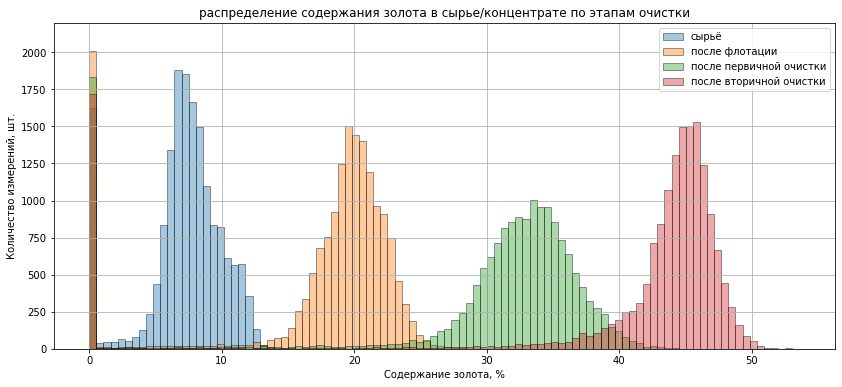

In [22]:
data_train_int[au_con].plot.hist(bins=100, edgecolor = 'black', ylim=(0, 2200), figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение содержания золота в сырье/концентрате по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend);

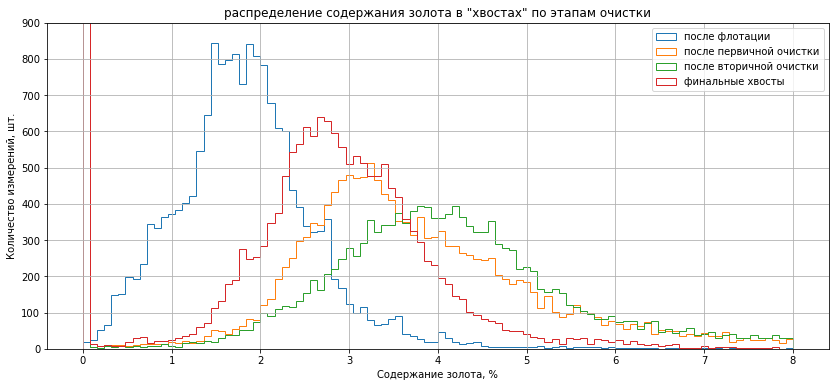

In [23]:
data_train_int[au_tail].plot(
    kind='hist', histtype='step', range=(0, 8), bins=100, ylim=(0, 900), figsize=(14, 6), grid=True)
plt.title('распределение содержания золота в "хвостах" по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend_tail);

In [24]:
display(data_train_int.loc[:, au_tail].sample(10).T)

,1799,1430,15947,7548,15087,12896,134,9706,5185,3199
0cl_out_tail_au,1.849855,1.859214,0.628323,2.081148,0.649446,1.606849,2.125659,1.795518,2.114979,2.997178
1cl_out_tail_au,0.000000,2.885427,0.646405,0.000000,1.734453,2.882658,4.148305,3.371713,5.377626,4.629328
2cl_out_tail_au,0.000000,2.289082,2.393647,0.000000,3.491403,4.542417,4.235338,5.251210,4.527313,3.619407
final_out_tail_au,0.000000,2.616956,1.828275,0.000000,1.743115,3.083876,2.149392,2.895525,3.757059,3.234587


In [25]:
display(data_train_int[au_tail].mean())

0cl_out_tail_au      1.841012
1cl_out_tail_au      3.577243
2cl_out_tail_au      3.919292
final_out_tail_au    2.677748
dtype: float64

#### Серебро

In [26]:
display(data_train_int.loc[:, ag_con].sample(10).T)

,12718,10873,4153,14702,5723,8741,12893,9369,10498,5823
0cl_in_feed_ag,13.048896,7.973955,6.175456,6.666663,8.244090,0.0,12.336661,7.617065,6.456900,0.0
0cl_out_con_ag,14.496584,7.458753,4.763810,9.750795,14.373093,0.0,13.637655,10.258004,12.101235,0.0
1cl_out_con_ag,8.176695,0.000000,0.000000,7.904906,6.572703,0.0,10.910321,6.771972,6.543327,0.0
final_out_con_ag,5.989849,5.925380,0.000000,4.249986,3.248456,0.0,6.175625,4.102975,4.523512,0.0


In [27]:
display(data_train_int[ag_con].mean())

0cl_in_feed_ag       7.799291
0cl_out_con_ag      10.535823
1cl_out_con_ag       7.388568
final_out_con_ag     4.699864
dtype: float64

#### Свинец

In [28]:
display(data_train_int.loc[:, pb_con].sample(10).T)

,7854,9890,10077,14754,5790,15488,2642,312,1064,7875
0cl_in_feed_pb,4.001770,2.881875,3.050537,3.265906,3.965442,3.172845,3.071371,3.217249,3.239470,3.387268
0cl_out_con_pb,8.850666,5.557524,0.000000,8.094376,9.316680,8.405950,7.449229,7.503249,6.097447,8.712168
1cl_out_con_pb,11.191340,7.422535,0.000000,9.394609,11.943973,10.258195,3.571573,8.485622,7.708254,9.104524
final_out_con_pb,11.465020,9.463150,11.764648,9.674683,10.188269,8.836356,11.333126,11.604623,9.676997,11.384942


In [29]:
display(data_train_int[pb_con].mean())

0cl_in_feed_pb      3.187377
0cl_out_con_pb      6.854436
1cl_out_con_pb      8.506197
final_out_con_pb    9.080430
dtype: float64

Концентрация золота с каждым этапом растет на 10-12%, что на выходе позволяет увеличить его содержание до 40-50%. При этом содержание серебра после флотации немного возрастает, а далее падает, а свинец значительно прибавляет на флотации и немного после 1 и 2 очистки.   
Процентное содержание золота в "хвостах" около 1-5%. Наибольшие потери (относительные) на вторичной очистке.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

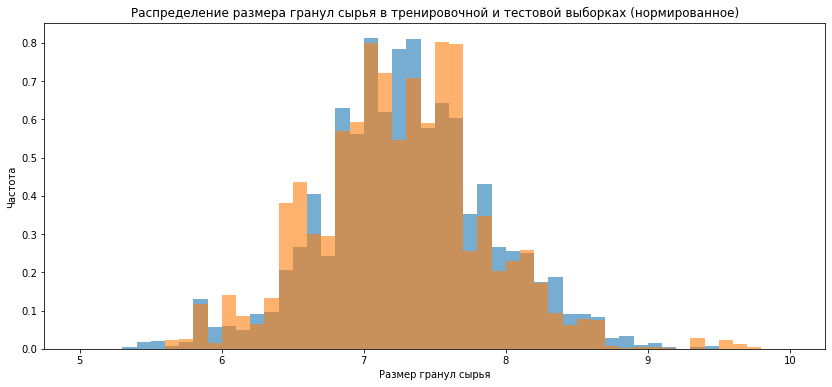

In [30]:
data_train_int['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(14, 6), density=True, alpha = 0.6)
data_test['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(14, 6), density=True, alpha = 0.6)
plt.title('Распределение размера гранул сырья в тренировочной и тестовой выборках (нормированное)'); 
plt.ylabel('Частота')
plt.xlabel('Размер гранул сырья');

Распределения схожи. Выборка корректна.

### Исследование суммарных концентраций веществ на разных стадиях

Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.

In [31]:
data_train_int['0cl_sum'] = data_train_int['0cl_in_feed_ag']
for col in ['0cl_in_feed_pb', '0cl_in_feed_sol', '0cl_in_feed_au']:
    data_train_int['0cl_sum'] += data_train_int[col]
    
data_train_int['1cl_sum'] = data_train_int['1cl_out_con_ag']
for col in ['1cl_out_con_pb', '1cl_out_con_sol', '1cl_out_con_au']:
    data_train_int['1cl_sum'] += data_train_int[col]

data_train_int['final_sum'] = data_train_int['final_out_con_ag']
for col in ['final_out_con_pb', 'final_out_con_sol', 'final_out_con_au']:
    data_train_int['final_sum'] += data_train_int[col]

sum_con = ['0cl_sum', '1cl_sum', 'final_sum']

In [32]:
data_train_int[sum_con].describe()

,0cl_sum,1cl_sum,final_sum
count,16860.000000,16860.000000,16860.000000
mean,50.437052,53.904050,61.284125
std,18.150602,20.549105,21.669294
min,0.000000,0.000000,0.000000
25%,50.255223,55.023514,66.533865
50%,55.772467,61.075012,68.802985
75%,60.258431,64.859092,70.693809
max,76.024095,76.918076,80.210644


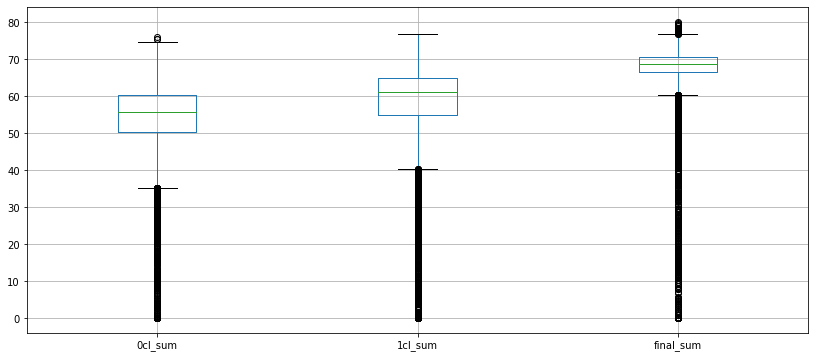

In [33]:
data_train_int[sum_con].boxplot(figsize=(14, 6));

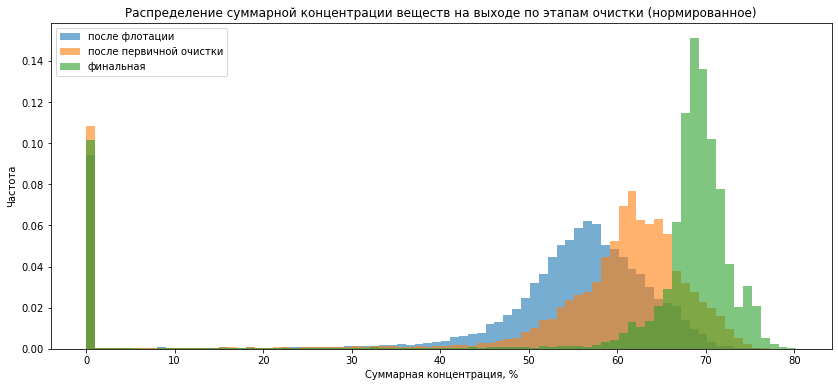

In [34]:
data_train_int[sum_con].plot.hist(bins=80, figsize=(14, 6), alpha = 0.6, density=True)
plt.title('Распределение суммарной концентрации веществ на выходе по этапам очистки (нормированное)'); 
plt.ylabel('Частота')
plt.xlabel('Суммарная концентрация, %')
plt.legend(['после флотации', 'после первичной очистки', 'финальная']);

In [35]:
#data_train_int_min = data_train_int[
#    (data_train_int['0cl_sum']<1) | (data_train_int['1cl_sum']<1) | (data_train_int['final_sum']<1)]
#data_train_int_min[sum_con].plot.hist(bins=80, figsize=(14, 6), alpha = 0.8);

Вероятно суммарные значения концентрации металлов < 0,05 являются выбросами. Также считаю что целевая концентрация (0cl_in_feed_ag, 0cl_out_con_ag, 1cl_out_con_ag, final_out_con_ag) ниже 0,05 (%) является ошибкой оборудования и только внесет "шум" при обучении модели.

### Удаление выбросов

In [36]:
con_threshold = 0.05
print(data_train_int['0cl_sum'].count())
data_train_int_drop1 = data_train_int[(data_train_int['0cl_sum']>con_threshold) | 
                                      (data_train_int['1cl_sum']>con_threshold) | 
                                      (data_train_int['final_sum']>con_threshold)]
print(data_train_int_drop1['0cl_sum'].count())

16860
15418


In [37]:
print(data_train_int_drop1['0cl_in_feed_au'].count())
data_train_int_drop2 = data_train_int_drop1[(data_train_int_drop1['0cl_in_feed_au']>con_threshold) | 
                                            (data_train_int_drop1['0cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['1cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['final_out_con_au']>con_threshold)]
print(data_train_int_drop2['0cl_in_feed_au'].count())

15418
15418


In [38]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5856 non-null   datetime64[ns]
 1   1cl_in_sulfate        5554 non-null   float64       
 2   1cl_in_depressant     5572 non-null   float64       
 3   1cl_in_feed_size      5856 non-null   float64       
 4   1cl_in_xanthate       5690 non-null   float64       
 5   1cl_st_fb8_a_air      5840 non-null   float64       
 6   1cl_st_fb8_a_level    5840 non-null   float64       
 7   1cl_st_fb8_b_air      5840 non-null   float64       
 8   1cl_st_fb8_b_level    5840 non-null   float64       
 9   1cl_st_fb8_c_air      5840 non-null   float64       
 10  1cl_st_fb8_c_level    5840 non-null   float64       
 11  1cl_st_fb8_d_air      5840 non-null   float64       
 12  1cl_st_fb8_d_level    5840 non-null   float64       
 13  0cl_in_feed_ag    

In [39]:
print(data_test['date'].count())
data_test_drop2 = data_test[data_test['0cl_in_feed_au']>con_threshold]
print(data_test_drop2['date'].count())

5856
5471


На удалении выбросов (суммарные концентрации и концентрации золота на каждом этапе > 0.05) теряем: 
* тренировочная выборка - 1442 строки (8.5%)
* тестовая выборка - 385 строк (6.6%) 

### Выбор и масштабирование признаков

In [40]:
#проиндексируем датой 
#for df in [data_train_int_drop2, data_test_drop2, data_full]:
#    df.index = df['date']
#    df.index.name = None
#- не понял как обратиться по Datetime индексу
#target_test = data_full[features_test.index]

In [41]:
data_test_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5471 non-null   datetime64[ns]
 1   1cl_in_sulfate        5457 non-null   float64       
 2   1cl_in_depressant     5454 non-null   float64       
 3   1cl_in_feed_size      5471 non-null   float64       
 4   1cl_in_xanthate       5457 non-null   float64       
 5   1cl_st_fb8_a_air      5471 non-null   float64       
 6   1cl_st_fb8_a_level    5471 non-null   float64       
 7   1cl_st_fb8_b_air      5471 non-null   float64       
 8   1cl_st_fb8_b_level    5471 non-null   float64       
 9   1cl_st_fb8_c_air      5471 non-null   float64       
 10  1cl_st_fb8_c_level    5471 non-null   float64       
 11  1cl_st_fb8_d_air      5471 non-null   float64       
 12  1cl_st_fb8_d_level    5471 non-null   float64       
 13  0cl_in_feed_ag    

In [42]:
data_test_target = data_test_drop2[['date', '1cl_in_sulfate']].merge(data_full[['date', '0cl_out_recovery', 'final_out_recovery']], on='date', how='left')

In [43]:
data_train_int_drop2.isna().sum().sum()

0

In [44]:
#Разделим на features и target
features = data_test_drop2.drop(['date'], axis='columns').columns
targets = ['0cl_out_recovery', 'final_out_recovery']

features_train = data_train_int_drop2[features].values
target_train = data_train_int_drop2[targets].values

In [45]:
#scaler = StandardScaler()
#numeric = list(features_train.columns)
#scaler.fit(features_train[numeric])

#features_train[numeric] = scaler.transform(features_train[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])

## Обучение и проверка модели
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией.
Выберите лучшую модель и проверьте её на тестовой выборке. Опишите
выводы.

Вам пригодятся формулы метрик качества: см. пдф или распечатку


### Функция для вычисления sMAPE

In [46]:
def smape_calc(targets, predictions):
    
    sm_r = 0
    sm_f = 0
    length = targets.shape[0]
    smape_val = 0
    
    for i in range(length):
        
        rrt = targets[i][0]#recovery rouger target
        rrp = predictions[i][0]#recovery rouger predicted
        sm_r += abs(rrt-rrp)/(abs(rrt)+abs(rrp))
        
        rft = targets[i][1] #recovery final target
        rfp = predictions[i][1] #recovery final predicted
        sm_f += abs(rft-rfp)/(abs(rft)+abs(rfp))
        
        smape_val = (2*0.25*sm_r+2*0.75*sm_f)/length
    return smape_val

### Обучение моделей

In [47]:
N = 5
kfold = KFold(n_splits=N, random_state=123, shuffle=True)
#train_test_indexes = kfold.split(features_train)

#### Линейная регрессия

In [48]:
model1 = LinearRegression()
cv_smape = 0

for train_folds_indexes, test_fold_indexes in kfold.split(features_train):
    model1.fit(features_train[train_folds_indexes], target_train[train_folds_indexes])
    predictions_train = model1.predict(features_train[test_fold_indexes])
    sm = smape_calc(target_train[test_fold_indexes], predictions_train)
    cv_smape += sm/N
print(cv_smape)

0.11519261243682187


In [49]:
model2 = LinearRegression()

In [59]:
smape_score = make_scorer(smape_calc, greater_is_better=True)

In [60]:
cv2_smape = cross_val_score(model2, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv2_smape.mean())

0.11519261243682186


#### Решающее дерево

In [61]:
model3 = DecisionTreeRegressor()

In [67]:
parametrs = { 'max_depth': [2, 4, 8, 12, 16],
              'min_samples_leaf': [2, 4, 8, 12, 16],
              'min_samples_split': [2, 4, 8, 12, 16]
            }

In [68]:
grid = GridSearchCV(model3, parametrs, cv=kfold, n_jobs=-1, scoring=smape_score)
grid.fit(features_train, target_train)

KeyboardInterrupt: 

In [ ]:
params = grid.best_params_
print(params)


In [56]:
model3 = DecisionTreeRegressor.set_params(**params)
cv3_smape = cross_val_score(model3, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv3_smape.mean())

TypeError: set_params() missing 1 required positional argument: 'self'

In [ ]:

    max_depth – максимальная глубина дерева
    max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
    min_samples_leaf – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов


#### Подбор параметров GridSearchCV

Отдельно создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. Для примера будем использовать следующие параметры:

n_estimators – число деревьев в лесу. Оно будет изменяться от 10 до 50 с шагом 10

max_depth – глубина дерева. Она будет изменяться от 1 до 12 с шагом в 2

min_samples_leaf – минимальное число образцов в листах. Оно будет изменяться от 1 до 7

min_samples_leaf – минимальное число образцов для сплита. Оно будет изменяться от 2 до 9.

In [ ]:
parametrs = { 'n_estimators': range (10, 51, 10), #Число деревьев
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [ ]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 30}

### Выводы по моделям для регионов

## Подготовка к расчёту прибыли

## Проверка на тестовой выборке

In [ ]:
features_test = data_test_drop2[features]

data_test_target = data_test_drop2[['date', '1cl_in_sulfate']].merge(
    data_full[['date', '0cl_out_recovery', 'final_out_recovery']], on='date', how='left')
target_test = data_test_target[targets]

## Расчет прибыли и оценка рисков 

### Регион 0

### Сравнение регинонов

В ходе исследования получены следующие характеристики:  

Характеристика | Регион 0 | Регион 1 | Регион 2
--- |--- | --- | ---
Cредний запас сырья (факт) (тыс. бар) | 92,9 | 69,3 | 94,9
--- |--- | --- | ---
LinearRegression() |--- | --- | ---
Cредний запас предсказанного сырья (тыс. бар)  | 92,5 | 69,3 | 95,1
RMSE (тыс. бар) | 37,6 | 0,9 | 40,1
R2 | 0.2813 | 0.9996 | 0.1931
--- |--- | --- | ---
Прибыль и риски |--- | --- | --- 
Средняя предсказанная прибыль (млн. руб.) |501.7 | 520.4 | 375.7
95 процентный доверительный интервал (млн. руб.) |-17.8  /  998.3 | 106.7  /  952.1 | -173.8  /  912.8
Вероятность убытков (млн. руб.) | 0.027| 0.002 | 0.095

## Выводы